In [10]:
import pandas as pd
import joblib

import os
import sys
alamat = "/".join(os.getcwd().split("\\")[:-2])
sys.path.append(alamat+'/praproses')
from sklearn.metrics import accuracy_score

In [11]:
df = pd.read_excel("data/tweet_bersih_100.xlsx") #data latih yang digunakan tweet_bersih_100.xlsx
twet = df.tweet.tolist()
label = df.label.tolist()
df.head() #menampilkan lima teraatas dari data bersih

,Unnamed: 0,tweet,label
0,0,buka visi misi begitu pukau sehingga buat pres...,positive
1,1,lebih baik pakai teknologi lama kaya negara in...,positive
2,2,kok arguing without menang,positive
3,3,jalan politik politik satu bukan politik pecah...,positive
4,4,juga fans lihat tampil serang hahaha,negative


positive    500
negative    500
Name: label, dtype: int64


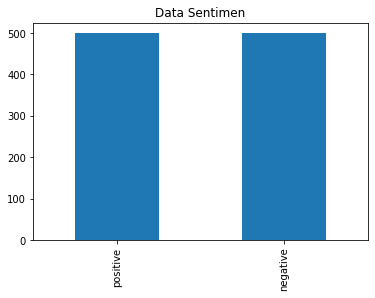

In [12]:
pd.value_counts(df['label']).plot.bar(title='Data Sentimen')
print(pd.value_counts(df['label']))

In [13]:
import numpy as np
from sklearn.model_selection import KFold
from Naive_Bayes_ import naive_bayes_ as nb
X = np.array(twet)
y = np.array(label)

In [14]:
k = 10
y = np.array(label)
kf = KFold(n_splits=k) #membuat model kfold sejumlah k
kf.get_n_splits(X)


# print(kf)
alpah_list = np.arange(0.1, 10+.1, .1)
rerata = list()
for alpha in alpah_list:
    print(str(alpha), end= "")
    clf = nb.NaiveBayesClassifier(alpha = alpha)
    sc_10 = list()
    for train_index, test_index in kf.split(X):
        print(".", end="")
    #     print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.train(X_train, y_train)

        
        y_pred = clf.predict(X_test)
        y_true = y_test
        
        sc = accuracy_score(y_true, y_pred)
        sc_10.append(sc)
#     print( sum(sc_10)/k, "|", alpha)
    rerata.append(sum(sc_10)/k)
    print(sum(sc_10)/k)
dict_ = {
    "alpha":alpah_list,
    "score":rerata
}
df_hasil = pd.DataFrame.from_dict(dict_)
sorted_ = df_hasil.sort_values("score", axis = 0, ascending = False)
sorted_.head()

0.1..........0.74
0.2..........0.736
0.30000000000000004..........0.7390000000000001
0.4..........0.74
0.5..........0.7390000000000001
0.6..........0.7379999999999999
0.7000000000000001..........0.741
0.8..........0.743
0.9..........0.7430000000000001
1.0..........0.7420000000000001
1.1..........0.74
1.2000000000000002..........0.743
1.3000000000000003..........0.743
1.4000000000000001..........0.745
1.5000000000000002..........0.748
1.6..........0.7489999999999999
1.7000000000000002..........0.7489999999999999
1.8000000000000003..........0.7489999999999999
1.9000000000000001..........0.7509999999999999
2.0..........0.7499999999999999
2.1..........0.7479999999999999
2.2..........0.7470000000000001
2.3000000000000003..........0.746
2.4000000000000004..........0.744
2.5000000000000004..........0.744
2.6..........0.743
2.7..........0.743
2.8000000000000003..........0.741
2.9000000000000004..........0.741
3.0000000000000004..........0.741
3.1..........0.741
3.2..........0.7390000000000001


,alpha,score
18,1.9,0.751
19,2.0,0.750
17,1.8,0.749
16,1.7,0.749
15,1.6,0.749


In [15]:
sorted_.alpha.tolist()[0]

1.9000000000000001

In [16]:
clf = nb.NaiveBayesClassifier(alpha = sorted_.alpha.tolist()[0])
clf.train(X, y) 
joblib.dump(clf,"model/naive_bayes.m")

['model/naive_bayes.m']

In [17]:
x = clf.predict(X)

In [18]:
ixx = 0
labelA = list()
labelP= list()

for i, j in zip(label, x):
    if i !=j:
        print(ixx)
        print(j)
        print("label asli",i)
        print(twet[ixx])
        print()
    ixx+=1

7
negative
label asli positive
apa bilang pak memang benar mau bukti di ejek asing v i r a l k a n prabow

10
negative
label asli positive
bidang hubung internasional anut prinsip kawan terlalu sedikit musuh terlalu banyak prabowo

17
positive
label asli negative
debat malam bukti sama emosional emosi pikir selamat

25
negative
label asli positive
pak percaya sama tni iya pak percaya saya percaya nya sama orang suka ngomong bayar

38
negative
label asli positive
si bilang bela pancasila dukung curut khilafah hti juga hapal pancasila

43
positive
label asli negative
ini tni pak pecat debatpilpres 2019 https t co usdobwdlba

51
positive
label asli negative
menang telak sih gilee bantai cara telak debat gilak brutal malam

52
negative
label asli positive
duh pak baik banget kalau bicara bahasa inggris arti tahu kalau pak bisa bahasa inggris

82
negative
label asli positive
sorot debatpilpres 2019 kali presiden sangat jelas masa kini masa depan realita solusi masalah

99
positive
label asl